<a href="https://colab.research.google.com/github/ibitabadger/DEEPLEARNING-NVIDIA2025/blob/main/01_exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**ENTREGA 1 - EDA**
Andrea Sánchez Castrillón,

Alejandro Vargas Ocampo

###**About  this file**
This file contain the stock data of NVIDIA from 1999 to 2025.
Source: [Kaggle NVIDIA Stock Data 2025](https://www.kaggle.com/datasets/umerhaddii/nvidia-stock-data-2024?resource=download&select=NVDA_1999-01-01_2025-08-18.csv)

In [17]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ibitabadger/DEEPLEARNING-NVIDIA2025/main/NVDA_1999-01-01_2025-08-18.csv')
df.head(5)

,date,open,high,low,close,adj_close,volume
0,NaN,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
1,1999-01-22,0.04374999925494194,0.04882799834012985,0.038802001625299454,0.041016001254320145,0.03760908916592598,2714688000
2,1999-01-25,0.04427099972963333,0.04583299905061722,0.041016001254320145,0.04531300067901611,0.04154917225241661,510480000
3,1999-01-26,0.04583299905061722,0.046744998544454575,0.04114599898457527,0.04179700091481209,0.038325235247612,343200000
4,1999-01-27,0.041926998645067215,0.04296899959445,0.0395830012857914,0.04166699945926666,0.03820601850748062,244368000


In [18]:
df.shape #Dimensiones del dataset

(6684, 7)

In [19]:
print(df.dtypes) # Tipos de datos de cada columna

date         object
open         object
high         object
low          object
close        object
adj_close    object
volume       object
dtype: object


In [20]:
#Tamaño en disco aproximado
memoria_mb = df.memory_usage(deep=True).sum() / (1024 * 1024)
print(f"Tamaño en memoria: {memoria_mb:.2f} MB (aprox.)")

Tamaño en memoria: 2.88 MB (aprox.)


In [21]:
print("Valores faltantes por columna:")
print(df.isnull().sum())

Valores faltantes por columna:
date         1
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64


In [22]:
df['target'] = (df['close'].shift(-1) > df['close']).astype(int)
df = df.dropna()  # eliminar la última fila que queda sin target

In [23]:
print(df)

            date                  open                  high  \
1     1999-01-22   0.04374999925494194   0.04882799834012985   
2     1999-01-25   0.04427099972963333   0.04583299905061722   
3     1999-01-26   0.04583299905061722  0.046744998544454575   
4     1999-01-27  0.041926998645067215      0.04296899959445   
5     1999-01-28   0.04166699945926666  0.041926998645067215   
...          ...                   ...                   ...   
6679  2025-08-11     182.0500030517578    183.83999633789062   
6680  2025-08-12     182.9600067138672    184.47999572753906   
6681  2025-08-13     182.6199951171875    183.97000122070312   
6682  2025-08-14                179.75    183.02000427246094   
6683  2025-08-15     181.8800048828125    181.89999389648438   

                       low                 close            adj_close  \
1     0.038802001625299454  0.041016001254320145  0.03760908916592598   
2     0.041016001254320145   0.04531300067901611  0.04154917225241661   
3      0.041

In [24]:
# ==== 5. Distribución de clases ====
print("Distribución de clases en 'target':")
print(df['target'].value_counts())
print("\nProporción de clases:")
print(df['target'].value_counts(normalize=True) * 100)

Distribución de clases en 'target':
target
1    3452
0    3231
Name: count, dtype: int64

Proporción de clases:
target
1    51.653449
0    48.346551
Name: proportion, dtype: float64


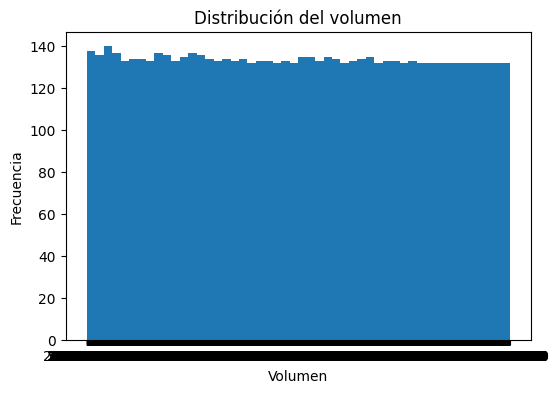

In [25]:
import matplotlib.pyplot as plt

# Gráfico de volumen
plt.figure(figsize=(6,4))
plt.hist(df['volume'], bins=50)
plt.title("Distribución del volumen")
plt.xlabel("Volumen")
plt.ylabel("Frecuencia")
plt.show()


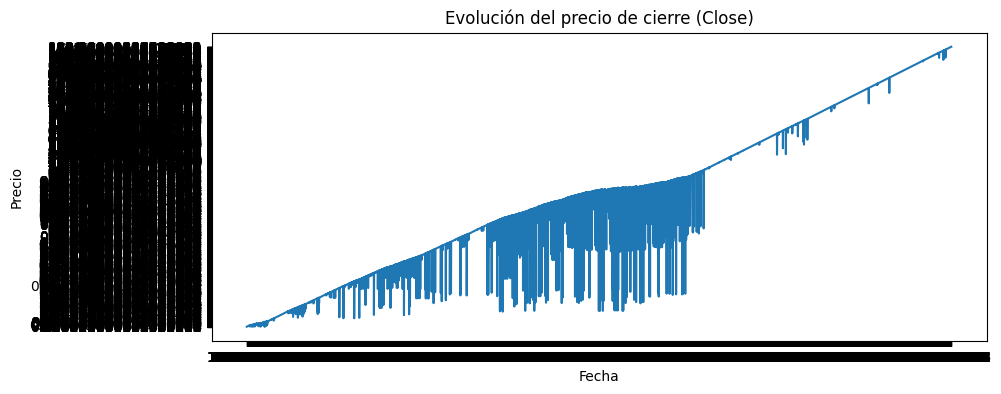

In [26]:
# Gráfico de precio

plt.figure(figsize=(10,4))
plt.plot(df['date'], df['close'])
plt.title("Evolución del precio de cierre (Close)")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()

In [27]:
#Correlacion entre variables

print("Matriz de correlación:")
print(df[['open', 'high', 'low', 'close', 'adj_close', 'volume']].corr())


Matriz de correlación:
               open      high       low     close  adj_close    volume
open       1.000000  0.999860  0.999800  0.999630   0.999630 -0.200284
high       0.999860  1.000000  0.999769  0.999813   0.999813 -0.199671
low        0.999800  0.999769  1.000000  0.999855   0.999855 -0.201249
close      0.999630  0.999813  0.999855  1.000000   1.000000 -0.200550
adj_close  0.999630  0.999813  0.999855  1.000000   1.000000 -0.200568
volume    -0.200284 -0.199671 -0.201249 -0.200550  -0.200568  1.000000


Text(0.5, 1.0, 'Autocorrelación del precio de cierre')

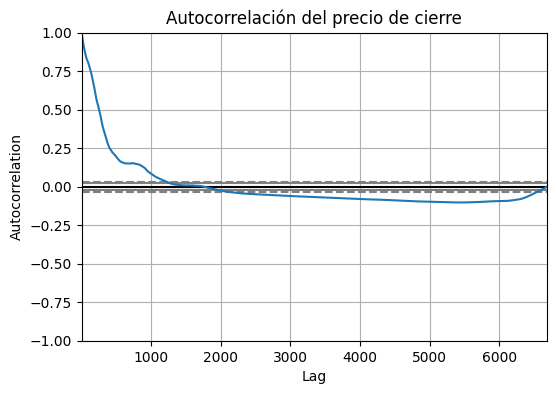

In [33]:
from pandas.plotting import autocorrelation_plot

df['close'] = pd.to_numeric(df['close'], errors='coerce')
plt.figure(figsize=(6,4))
autocorrelation_plot(df['close'])
plt.title("Autocorrelación del precio de cierre")